In [1]:
import nltk
import pandas as pd
import os
import plotly.graph_objs as go
import plotly
import numpy as np
from IPython.display import display, Markdown, Latex

plotly.offline.init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('C:/Users/Kenny/projects/pds/NLP-boardgames/data/token-long-sample.csv')
one = pd.read_csv('C:/Users/Kenny/projects/pds/NLP-boardgames/data/onehot-sample.csv')

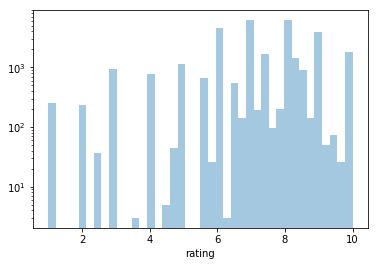

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
ax = sns.distplot(df['rating'], kde=False, bins=40, hist_kws={'log':True})

## BASELINE

In [4]:
from math import sqrt
def rmse(true, predicted):
    rmse = sqrt(((true-predicted)**2).mean())
    return rmse

Get the baseline RMSE if we just predict every comment is equal to the median for all ratings.

In [5]:
df['prediction'] = 7.5
df.head(10)

,gameID,rating,token,userID,prediction
0,37111.0,8.5,thematic,25308.0,7.5
1,37111.0,8.5,bluff,25308.0,7.5
2,37111.0,8.5,many,25308.0,7.5
3,37111.0,8.5,randomness,25308.0,7.5
4,37111.0,8.5,really,25308.0,7.5
5,37111.0,8.5,like,25308.0,7.5
6,37111.0,8.5,that,25308.0,7.5
7,37111.0,8.5,one,25308.0,7.5
8,37111.0,8.5,maybe,25308.0,7.5
9,37111.0,8.5,it,25308.0,7.5


In [6]:
rmse_baseline = rmse(df['rating'], df['prediction'])
display(Markdown(f"### Baseline RMSE: {rmse_baseline:.5f}"))

### Baseline RMSE: 1.70525

---

## Naive Word Medians

In [7]:
# Get the median for every word
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'Q_%s' % n
    return percentile_

stats = df[['token', 'rating']].groupby('token').agg([percentile(25), percentile(50), percentile(75), 'count'])
stats.columns = stats.columns.droplevel()
stats.head(10)

,Q_25,Q_50,Q_75,count
token,,,,
aaahhh,8.500,8.50,8.50,1
aarg,6.000,6.00,6.00,1
abbey,4.000,4.00,4.00,1
abilities,6.025,6.90,8.00,10
ability,6.325,7.00,7.75,6
able,6.000,7.60,9.00,8
aboms,8.000,8.00,8.00,1
about,6.550,8.00,8.20,55
above,6.125,7.25,8.00,4


What does the distribution of word medians look like compared to the actual ratings distribution?

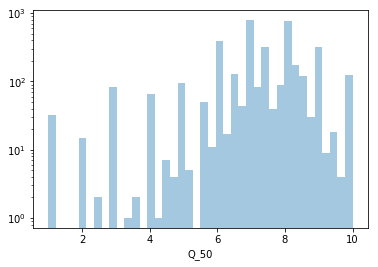

In [8]:
ax = sns.distplot(stats.Q_50, kde=False, bins=40, hist_kws={'log':True})

Train test split

In [9]:
# Split the data into a 70/30 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(one.iloc[:,3:], one['Rating'], test_size=0.33, random_state=42)

In [10]:
X_train = one.iloc[:,3:]
Qone = X_train.multiply(stats.Q_50)
Qone.head(10)

,aaahhh,aarg,abbey,abilities,ability,able,aboms,about,above,absolute,...,youre,yourself,yr,yspahan,yup,zertz,zman,zombie,zombies,zooleretto
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
N_total = X_train.iloc[:,3:].sum(axis=1)
predictions = Qone.sum(axis=1)/N_total

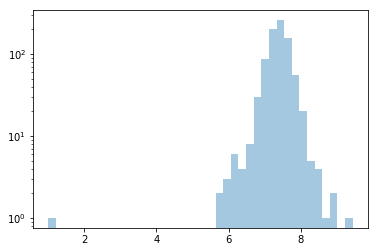

In [12]:
ax = sns.distplot(predictions, kde=False, bins=40, hist_kws={'log':True})

In [13]:
rmse_medians = rmse(one['Rating'], predictions)
display(Markdown(f"### Word Medians RMSE: {rmse_medians:.5f}"))

### Word Medians RMSE: 1.42387

An improvement of -0.28 RMSE rating

In [14]:
trace0 = go.Scatter(
    x=one['Rating'],
    y=predictions,
    mode='markers')

trace1 = go.Scatter(
    x=[0,10],
    y=[0,10],
    name='Ideal Line')

layout = go.Layout(
    xaxis=dict(title='Actual'),
    yaxis=dict(title='Predicted'),
    hovermode='closest',
    margin=dict(t=50))

data=[trace0, trace1]

fig = go.Figure(data, layout)
plotly.offline.iplot(fig, filename='predictions-naive.html')

# Scaling coefficients

## Word Medians w/ Linear Scaling

The first scaling method is based on how far the word's rating is from the comment ratings median. The score vectors will be multiplied by the scaling factor alpha before taking the average score for a comment. Alpha will equal 1 if the word's rating is equal to the comment ratings median (7.5). If the word's score is 6.5, alpha will be 2 so that word will count twice as much as a neutral word.

In [15]:
alpha = abs(stats.Q_50 - 7.5) + 1
alpha

token
aaahhh            2.00
aarg              2.50
abbey             4.50
abilities         1.60
ability           1.50
able              1.10
aboms             1.50
about             1.50
above             1.25
absolute          3.50
absolutely        1.50
abstract          1.00
abstracts         1.50
accelerating      1.50
acceptable        1.70
accessible        1.60
accessory         1.50
accomplishing     1.50
accomplishment    2.50
accrued           1.50
accumulate        1.50
accurate          1.50
accusations       1.50
acg               1.50
achieve           1.50
achieved          2.50
achievement       3.50
achievements      2.50
acomplished       1.20
acquire           1.25
                  ... 
writing           6.50
wrong             1.50
xbla              1.00
xmas              1.50
yahtzee           2.50
yard              1.50
yawn              2.00
yay               1.00
yeah              2.50
year              2.00
years             1.50
yell              2.20
yelle

In [16]:
# Linear scaling
Qone_scaled = Qone.multiply(alpha, axis=1)
N_total = X_train.multiply(alpha, axis=1).sum(axis=1)
predictions = Qone_scaled.sum(axis=1)/N_total

print(rmse(one['Rating'], predictions))

1.2356615455481383


In [17]:
trace0 = go.Scatter(
    x=one['Rating'],
    y=predictions,
    mode='markers')

trace1 = go.Scatter(
    x=[0,10],
    y=[0,10],
    name='Ideal Line')

layout = go.Layout(
    xaxis=dict(title='Actual'),
    yaxis=dict(title='Predicted'),
    hovermode='closest',
    margin=dict(t=50))

data=[trace0, trace1]

fig = go.Figure(data, layout)
plotly.offline.iplot(fig, filename='predictions-naive.html')

What if we stretch alpha out by a multiplicative factor on the difference?

In [18]:
alpha = 1000*abs(stats.Q_50 - 7.5) + 1

Qone_scaled = Qone.multiply(alpha, axis=1)
N_total = X_train.multiply(alpha, axis=1).sum(axis=1)
predictions = Qone_scaled.sum(axis=1)/N_total

rmse_linearscaling = rmse(one['Rating'], predictions)

In [19]:
display(Markdown(f"### Linear Scaling RMSE: {rmse_linearscaling:.5f}"))

### Linear Scaling RMSE: 1.03749

See how this scaling factor affects the RMSE

In [20]:
rmse_history = []
for i in range(1,1000, 10):
    alpha = i*abs(stats.Q_50 - 7.5) + 1
    Qone_scaled = Qone.multiply(alpha, axis=1)
    N_total = X_train.multiply(alpha, axis=1).sum(axis=1)
    predictions = Qone_scaled.sum(axis=1)/N_total
    error = rmse(one['Rating'], predictions)
    print(error)
    rmse_history.append(error)

1.2356615455481383
1.0721557175807483
1.0562332506208822
1.0502401850755276
1.0470997145838605
1.0451674612625534
1.0438589001617284
1.0429141112864053
1.0421999559276425
1.0416411896286397
1.0411920834910282
1.0408232461866282
1.0405149268868978
1.0402533625799415
1.0400286690180558
1.0398335643611931
1.0396625656632852
1.0395114657325526
1.039376982507655
1.0392565180388202
1.039147989082547
1.039049705657593
1.0389602824350948
1.0388785730531418
1.0388036207227687
1.0387346205986496
1.0386708907702535
1.038611849654315
1.038556998199113
1.0385059057467148
1.0384581987050248
1.0384135513990556
1.0383716786275163
1.0383323295650606
1.0382952827346812
1.0382603418373657
1.0382273322732132
1.0381960982238283
1.038166500193145
1.0381384129247615
1.0381117236302337
1.0380863304754533
1.038062141282312
1.0380390724107265
1.0380170477925008
1.0379959980934428
1.037975859984355
1.0379565755047064
1.0379380915055487
1.0379203591603843
1.0379033335345131
1.0378869732048597
1.0378712399235173
1

In [21]:
trace0 = go.Scatter(
    x=[i for i in range(1,1000, 10)],
    y=rmse_history,
    mode='lines')

layout = go.Layout(
    xaxis=dict(title='Alpha',
              type='log'),
    yaxis=dict(title='RMSE'),
    hovermode='closest',
    margin=dict(t=50)
)

data=[trace0]

fig = go.Figure(data, layout)
plotly.offline.iplot(fig, filename='rmse-alpha.html')

In [22]:
trace0 = go.Scatter(
    x=one['Rating'],
    y=predictions,
    mode='markers')

trace1 = go.Scatter(
    x=[0,10],
    y=[0,10],
    name='Ideal Line')

layout = go.Layout(
    xaxis=dict(title='Actual'),
    yaxis=dict(title='Predicted'),
    hovermode='closest',
    margin=dict(t=50))

data=[trace0, trace1]

fig = go.Figure(data, layout)
plotly.offline.iplot(fig, filename='predictions-naive.html')

An RMSE of 1.037 is about the best we can achieve with linear scaling, what about other scaling methods?

## Word Medians w/ Power Scaling

In [23]:
rmse_history = []
for i in [1, 1.2, 1.4, 1.6, 1.8, 2, 2.5, 3, 3.5, 4, 4.5, 5]:
    alpha = abs(stats.Q_50 - 7.5)**i + 1
    Qone_scaled = Qone.multiply(alpha, axis=1)
    N_total = X_train.multiply(alpha, axis=1).sum(axis=1)
    predictions = Qone_scaled.sum(axis=1)/N_total
    error = rmse(one['Rating'], predictions)
    print(error)
    rmse_history.append(error)

1.2356615455481383
1.199562183688665
1.164365425537354
1.1311626932960595
1.1008352789203113
1.074055952482047
1.025371627634678
1.0033743173492904
1.0024458624462114
1.0142322139315805
1.0319381498009088
1.0511548554755454


In [24]:
rmse_powerscaling = rmse_history[8]
display(Markdown(f"### Linear Scaling RMSE: {rmse_powerscaling:.5f}"))

### Linear Scaling RMSE: 1.00245

In [25]:
trace0 = go.Scatter(
    x=[1, 1.2, 1.4, 1.6, 1.8, 2, 2.5, 3, 3.5, 4, 4.5, 5],
    y=rmse_history,
    mode='lines')

layout = go.Layout(
    xaxis=dict(title='Alpha',
              type='log'),
    yaxis=dict(title='RMSE'),
    hovermode='closest',
    margin=dict(t=50)
)

data=[trace0]

fig = go.Figure(data, layout)
plotly.offline.iplot(fig, filename='rmse-alpha.html')

Power scaling on its own can reduce the RMSE to 1.002! What if we can combine both a power and linear scaling method?

## Combining Both 

In [26]:
m = [1, 10, 100, 1000]
b = [1, 2, 3, 4, 5]

rmse_history = {}
for i in m:
    for j in b:
        alpha = i*abs(stats.Q_50 - 7.5)**j + 1
        Qone_scaled = Qone.multiply(alpha, axis=1)
        N_total = X_train.multiply(alpha, axis=1).sum(axis=1)
        predictions = Qone_scaled.sum(axis=1)/N_total
        error = rmse(one['Rating'], predictions)
        print(error)
        rmse_history[(i, j)] = error

1.2356615455481383
1.074055952482047
1.0033743173492904
1.0142322139315805
1.0511548554755454
1.0753245083640262
0.9452324793977419
0.9754832089850477
1.0444922859760652
1.1035912031440296
1.041232988322609
0.9359830636436453
1.000917405656284
1.0869842432636034
1.1491009353152106
1.037485837559666
0.9359826158095824
1.006156778850535
1.095299734911499
1.1585172527332188


In [27]:
rmse_linearpower = rmse_history[100,2]
display(Markdown(f"### Linear Scaling RMSE: {rmse_linearpower:.5f}"))

### Linear Scaling RMSE: 0.93598

The lowest error of 0.936 corresponds to a=100, b=2 (quadratic with scaling factor 100). Plot the results at this setting.

In [28]:
alpha = 100*abs(stats.Q_50 - 7.5)**2 + 1
Qone_scaled = Qone.multiply(alpha, axis=1)
N_total = X_train.multiply(alpha, axis=1).sum(axis=1)
predictions = Qone_scaled.sum(axis=1)/N_total

trace0 = go.Scatter(
    x=one['Rating'],
    y=predictions,
    mode='markers')

trace1 = go.Scatter(
    x=[0,10],
    y=[0,10],
    name='Ideal Line')

layout = go.Layout(
    xaxis=dict(title='Actual'),
    yaxis=dict(title='Predicted'),
    hovermode='closest',
    margin=dict(t=50))

data=[trace0, trace1]

fig = go.Figure(data, layout)
plotly.offline.iplot(fig, filename='predictions-naive-both.html')

If we look at the predictions histogram, it's now much more similar to the actual ratings distribution

The combined scaling method looks like:

\begin{equation*}
y = alpha * x
\end{equation*}
where alpha is the scaling coefficient based on the difference of token to the median 

## Adding Dispersion Penalty Term

The idea here is that if a word has a very high dispersion in ratings, we trust it less so we give it a penalty term. Words with very tight dispersion we trust more.

In [29]:
stats['IQR'] = stats.Q_75 - stats.Q_25
stats.head(10)

,Q_25,Q_50,Q_75,count,IQR
token,,,,,
aaahhh,8.500,8.50,8.50,1,0.000
aarg,6.000,6.00,6.00,1,0.000
abbey,4.000,4.00,4.00,1,0.000
abilities,6.025,6.90,8.00,10,1.975
ability,6.325,7.00,7.75,6,1.425
able,6.000,7.60,9.00,8,3.000
aboms,8.000,8.00,8.00,1,0.000
about,6.550,8.00,8.20,55,1.650
above,6.125,7.25,8.00,4,1.875


In [30]:
stats.IQR.max()

6.1875

In [31]:
beta = 1 - (stats.IQR/stats.IQR.max())
beta

token
aaahhh            1.000000
aarg              1.000000
abbey             1.000000
abilities         0.680808
ability           0.769697
able              0.515152
aboms             1.000000
about             0.733333
above             0.696970
absolute          1.000000
absolutely        0.919192
abstract          0.838384
abstracts         1.000000
accelerating      1.000000
acceptable        1.000000
accessible        0.927273
accessory         1.000000
accomplishing     1.000000
accomplishment    1.000000
accrued           1.000000
accumulate        1.000000
accurate          0.838384
accusations       1.000000
acg               1.000000
achieve           1.000000
achieved          1.000000
achievement       1.000000
achievements      1.000000
acomplished       1.000000
acquire           0.959596
                    ...   
writing           1.000000
wrong             0.232323
xbla              1.000000
xmas              1.000000
yahtzee           1.000000
yard              0.71

In [32]:
Qone_scaled = Qone.multiply(beta, axis=1)
N_total = X_train.multiply(beta, axis=1).sum(axis=1)
predictions = Qone_scaled.sum(axis=1)/N_total

print(rmse(one['Rating'], predictions))

1.3781630871659198


How can we make the effect of beta stronger? Current form of beta only penalizes if IQR is large, but doesn't do anything to very tight IQRs. How can we reward tight IQRs?

In [33]:
import numpy as np

beta = np.exp(abs(stats.IQR - stats.IQR.max()))

Qone_scaled = Qone.multiply(beta, axis=1)
N_total = X_train.multiply(beta, axis=1).sum(axis=1)
predictions = Qone_scaled.sum(axis=1)/N_total

print(rmse(one['Rating'], predictions))

1.1204275782983695


## Combined Alpha with Beta scaling

In [34]:
alpha = 100*abs(stats.Q_50 - 7.5)**2 + 1
beta = np.exp(abs(stats.IQR - stats.IQR.max()))

Qone_scaled = Qone.multiply(alpha*beta, axis=1)
N_total = X_train.multiply(alpha*beta, axis=1).sum(axis=1)
predictions = Qone_scaled.sum(axis=1)/N_total

print(rmse(one['Rating'], predictions))

0.7385926351898661


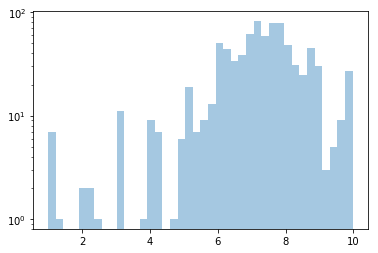

In [35]:
ax = sns.distplot(predictions, kde=False, bins=40, hist_kws={'log':True})

In [36]:
trace0 = go.Scatter(
    x=one['Rating'],
    y=predictions,
    mode='markers')

trace1 = go.Scatter(
    x=[0,10],
    y=[0,10],
    name='Ideal Line')

layout = go.Layout(
    xaxis=dict(title='Actual'),
    yaxis=dict(title='Predicted'),
    hovermode='closest',
    margin=dict(t=50))

data=[trace0, trace1]

fig = go.Figure(data, layout)
plotly.offline.iplot(fig, filename='predictions-naive-both.html')

## Using Adjectives Only

The model works pretty well now, especially for lower ratings. What could be causing the large amount of dispersion in the middle to higher ratings? A couple of theories:

1. At lower ratings, fewer words are used in the average comment.
2. At lower ratings, comments are more specific. While comments in the middle and higher ratings will have more ambiguous wording.

Look at the error dispersion at each rating:

In [37]:
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords

stop = stopwords.words('english')
stop[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [38]:
all_words = [lemma for lemma in wn.all_lemma_names()]
len(all_words)

147306

In [39]:
no_stops = df[~df.token.isin(stop)]
no_stops.head(10)

,gameID,rating,token,userID,prediction
0,37111.0,8.5,thematic,25308.0,7.5
1,37111.0,8.5,bluff,25308.0,7.5
2,37111.0,8.5,many,25308.0,7.5
3,37111.0,8.5,randomness,25308.0,7.5
4,37111.0,8.5,really,25308.0,7.5
5,37111.0,8.5,like,25308.0,7.5
7,37111.0,8.5,one,25308.0,7.5
8,37111.0,8.5,maybe,25308.0,7.5
11,37111.0,8.5,fun,25308.0,7.5
13,37111.0,8.5,play,25308.0,7.5


In [40]:
# Reduce words to only those found in NLTK
clean = no_stops[no_stops.token.isin(all_words)]
clean.head(10)

,gameID,rating,token,userID,prediction
0,37111.0,8.5,thematic,25308.0,7.5
1,37111.0,8.5,bluff,25308.0,7.5
2,37111.0,8.5,many,25308.0,7.5
3,37111.0,8.5,randomness,25308.0,7.5
4,37111.0,8.5,really,25308.0,7.5
5,37111.0,8.5,like,25308.0,7.5
7,37111.0,8.5,one,25308.0,7.5
8,37111.0,8.5,maybe,25308.0,7.5
11,37111.0,8.5,fun,25308.0,7.5
13,37111.0,8.5,play,25308.0,7.5


In [41]:
adj_only = clean[clean.token.apply(lambda word: wn.synsets(word)[0].pos())=='a']
adj_only.head(10)

,gameID,rating,token,userID,prediction
0,37111.0,8.5,thematic,25308.0,7.5
2,37111.0,8.5,many,25308.0,7.5
66,37111.0,8.5,thematic,25308.0,7.5
72,12.0,8.0,ugly,54313.0,7.5
226,164153.0,6.0,random,47675.0,7.5
279,13291.0,7.0,new,171066.0,7.5
288,13291.0,7.0,new,171066.0,7.5
295,13291.0,7.0,fresh,171066.0,7.5
300,31260.0,7.5,sure,96948.0,7.5
337,12493.0,9.5,different,70621.0,7.5


In [42]:
import bgnlp
one_adj = bgnlp.get_one(adj_only)
one_adj.head(10)

,gameID,userID,Rating,able,acceptable,accessible,accurate,actual,addictive,adequate,...,unnecessary,unpleasant,unpredictable,unsure,unusual,useful,useless,usual,weak,wide
0,3.0,24732.0,7.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,27836.0,9.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,69476.0,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,100693.0,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,27003.0,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,11.0,20323.0,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,11.0,20667.0,7.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,11.0,56726.0,8.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,12.0,42121.0,10.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,12.0,54313.0,8.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
stats_adj = adj_only[['token', 'rating']].groupby('token').agg([percentile(25), percentile(50), percentile(75), 'count'])
stats_adj.columns = stats_adj.columns.droplevel()
stats_adj['IQR'] = stats_adj.Q_75 - stats_adj.Q_25
stats_adj.head(10)

,Q_25,Q_50,Q_75,count,IQR
token,,,,,
able,6.00,7.6,9.00,8,3.00
acceptable,8.20,8.2,8.20,1,0.00
accessible,7.75,8.1,8.20,4,0.45
accurate,7.50,8.0,8.50,2,1.00
actual,7.75,8.0,9.00,3,1.25
addictive,8.50,9.0,9.25,4,0.75
adequate,8.00,8.0,8.00,1,0.00
advantageous,9.00,9.0,9.00,1,0.00
afraid,8.00,8.0,8.00,1,0.00


In [44]:
Qone_adj = one_adj.iloc[:,3:].multiply(stats_adj.Q_50)
Qone_adj.head(10)

,able,acceptable,accessible,accurate,actual,addictive,adequate,advantageous,afraid,aggressive,...,unnecessary,unpleasant,unpredictable,unsure,unusual,useful,useless,usual,weak,wide
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
N_total = one_adj.iloc[:,3:].sum(axis=1)
predictions = Qone_adj.sum(axis=1)/N_total

In [46]:
rmse_adj = rmse(adj_only['rating'], predictions)
display(Markdown(f"### Adj Only RMSE: {rmse_adj:.5f}"))

### Adj Only RMSE: 1.40757

Slight improvement over the model with stop words and all word types. Now apply scaling. Note the optimal values for alpha and beta might have changed. Reoptimize

In [47]:
alpha = 100*abs(stats_adj.Q_50 - 7.5)**2 + 1
beta = np.exp(abs(stats_adj.IQR - stats_adj.IQR.max()))

Qone_scaled = Qone_adj.multiply(alpha*beta, axis=1)
N_total = one_adj.multiply(alpha*beta, axis=1).sum(axis=1)
predictions = Qone_scaled.sum(axis=1)/N_total

print(rmse(adj_only['rating'], predictions))

1.4053486636133004


Out of the box, we don't see as good of performance gain. Let's examine the original model with all words and understand why some of the ratings are worse than others.

## Try this model on the bigger dataset

In [48]:
token_full = pd.read_csv('C:/Users/Kenny/projects/pds/NLP-boardgames/data/token-long-full.csv')
onehot_full = pd.read_csv('C:/Users/Kenny/projects/pds/NLP-boardgames/data/onehot-full.csv')

In [49]:
token_full.head()

,gameID,rating,token,userID
0,37111.0,8.5,good,25308.0
1,37111.0,8.5,unique,25308.0
2,37111.0,8.5,take,25308.0
3,37111.0,8.5,on,25308.0
4,37111.0,8.5,the,25308.0


In [50]:
onehot_full.head()

,gameID,userID,Rating,abacus,abilities,ability,able,about,above,abruptly,...,zack,zendikar,zero,zesty,zombies,ėjimus,įdomių,įdomų,žaidėme,žinoma
0,3.0,24732.0,7.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,27836.0,9.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,69476.0,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,100693.0,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,130258.0,7.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
stats = token_full[['token', 'rating']].groupby('token').agg([percentile(25), percentile(50), percentile(75), 'count'])
stats.columns = stats.columns.droplevel()
stats['IQR'] = stats.Q_75-stats.Q_25
stats

,Q_25,Q_50,Q_75,count,IQR
token,,,,,
abacus,6.500,6.50,6.50,1,0.000
abilities,7.125,8.25,9.00,4,1.875
ability,5.000,7.00,7.50,7,2.500
able,5.940,7.00,8.00,13,2.060
about,6.000,7.00,8.00,71,2.000
above,6.750,7.50,8.50,4,1.750
abruptly,7.000,7.00,7.00,1,0.000
absence,7.000,7.00,7.00,1,0.000
absolutely,6.250,7.00,7.00,6,0.750


In [52]:
Qone = onehot_full.iloc[:,3:].multiply(stats.Q_50)
Qone

,abacus,abilities,ability,able,about,above,abruptly,absence,absolutely,absorb,...,zack,zendikar,zero,zesty,zombies,ėjimus,įdomių,įdomų,žaidėme,žinoma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
m = [1, 10, 100, 1000]
b = [1, 2, 3, 4, 5]

alpha = 100*abs(stats.Q_50 - 7.5)**2 + 1
beta = np.exp(abs(stats.IQR - stats.IQR.max()))

rmse_history = {}
for i in m:
    for j in b:
        alpha = i*abs(stats.Q_50 - 7.5)**j + 1
        Qone_scaled = Qone.multiply(alpha, axis=1)
        N_total = onehot_full.iloc[:,3:].multiply(alpha, axis=1).sum(axis=1)
        predictions = Qone_scaled.sum(axis=1)/N_total
        error = rmse(one['Rating'], predictions)
        print(error)
        rmse_history[(i, j)] = error

1.3090429693790373
1.1726688935000613
1.1241767818646327
1.139773996807104
1.1734175057649128
1.1732961315370305
1.0787195277788808
1.1224351622552882
1.1854220000118563
1.2352358041353855
1.1458491821606531
1.079519754548157
1.1521775473654525
1.2252135688639214
1.274244646783384
1.1429213914714278
1.0807271951603763
1.1577023163001712
1.232586178198846
1.2819984359502317


In [54]:
rmse_history

{(1, 1): 1.3090429693790373,
 (1, 2): 1.1726688935000613,
 (1, 3): 1.1241767818646327,
 (1, 4): 1.139773996807104,
 (1, 5): 1.1734175057649128,
 (10, 1): 1.1732961315370305,
 (10, 2): 1.0787195277788808,
 (10, 3): 1.1224351622552882,
 (10, 4): 1.1854220000118563,
 (10, 5): 1.2352358041353855,
 (100, 1): 1.1458491821606531,
 (100, 2): 1.079519754548157,
 (100, 3): 1.1521775473654525,
 (100, 4): 1.2252135688639214,
 (100, 5): 1.274244646783384,
 (1000, 1): 1.1429213914714278,
 (1000, 2): 1.0807271951603763,
 (1000, 3): 1.1577023163001712,
 (1000, 4): 1.232586178198846,
 (1000, 5): 1.2819984359502317}

In [55]:
alpha = 100*abs(stats.Q_50 - 7.5)**2 + 1
beta = np.exp(abs(stats.IQR - stats.IQR.max()))

Qone_scaled = Qone.multiply(alpha*beta, axis=1)
N_total = onehot_full.iloc[:,3:].multiply(alpha*beta, axis=1).sum(axis=1)
predictions = Qone_scaled.sum(axis=1)/N_total

print(rmse(one['Rating'], predictions))

0.8708347928148717


In [56]:
trace0 = go.Scatter(
    x=one['Rating'],
    y=predictions,
    mode='markers')

trace1 = go.Scatter(
    x=[0,10],
    y=[0,10],
    name='Ideal Line')

layout = go.Layout(
    xaxis=dict(title='Actual'),
    yaxis=dict(title='Predicted'),
    hovermode='closest',
    margin=dict(t=50))

data=[trace0, trace1]

fig = go.Figure(data, layout)
plotly.offline.iplot(fig, filename='predictions-naive-both.html')

## Make a sankey plot of the each rating to the top 20 ADJECTIVES in that rating

In [57]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [58]:
counts = df[['token', 'rating', 'userID']]
counts = counts[~counts.token.isin(stop)]
counts

,token,rating,userID
0,thematic,8.5,25308.0
1,bluff,8.5,25308.0
2,many,8.5,25308.0
3,randomness,8.5,25308.0
4,really,8.5,25308.0
5,like,8.5,25308.0
7,one,8.5,25308.0
8,maybe,8.5,25308.0
11,fun,8.5,25308.0
13,play,8.5,25308.0


In [59]:
ones = counts.groupby(['rating', 'token']).count().loc[1,:].sort_values('userID', ascending=False).reset_index()
ones = ones.iloc[:20,:]
ones

,token,userID
0,game,8
1,players,3
2,one,3
3,little,2
4,boy,2
5,hate,2
6,elimination,2
7,though,2
8,also,2
9,even,2


In [60]:
twos = counts.groupby(['rating', 'token']).count().loc[2,:].sort_values('userID', ascending=False).reset_index()
twos = twos.iloc[:20,:] 
twos

,token,userID
0,game,10
1,played,3
2,maybe,3
3,play,3
4,long,3
5,minutes,2
6,really,2
7,every,2
8,interesting,2
9,slowly,2


In [61]:
threes = counts.groupby(['rating', 'token']).count().loc[3,:].sort_values('userID', ascending=False).reset_index()
threes = threes.iloc[:20,:] 
threes

,token,userID
0,game,16
1,leader,7
2,cards,7
3,much,7
4,one,6
5,would,6
6,player,5
7,players,5
8,played,5
9,play,4


In [62]:
fours = counts.groupby(['rating', 'token']).count().loc[4,:].sort_values('userID', ascending=False).reset_index()
fours = fours.iloc[:20,:] 
fours

,token,userID
0,game,23
1,played,10
2,really,8
3,better,6
4,could,6
5,system,5
6,games,5
7,like,5
8,fun,4
9,way,4


In [63]:
fives = counts.groupby(['rating', 'token']).count().loc[5,:].sort_values('userID', ascending=False).reset_index()
fives = fives.iloc[:20,:] 
fives

,token,userID
0,game,32
1,play,10
2,like,10
3,much,7
4,good,7
5,fun,7
6,players,6
7,though,6
8,really,6
9,bit,5


In [64]:
sixes = counts.groupby(['rating', 'token']).count().loc[6,:].sort_values('userID', ascending=False).reset_index()
sixes = sixes.iloc[:20,:] 
sixes

,token,userID
0,game,134
1,play,49
2,like,30
3,fun,22
4,good,21
5,games,20
6,one,20
7,much,20
8,player,19
9,players,19


In [65]:
sevens = counts.groupby(['rating', 'token']).count().loc[7,:].sort_values('userID', ascending=False).reset_index()
sevens

,token,userID
0,game,177
1,play,67
2,players,43
3,like,40
4,fun,39
5,good,38
6,one,37
7,really,34
8,played,29
9,cards,24


In [66]:
eights = counts.groupby(['rating', 'token']).count().loc[8,:].sort_values('userID', ascending=False).reset_index()
eights

,token,userID
0,game,187
1,play,58
2,like,41
3,one,37
4,players,33
5,great,26
6,played,24
7,much,23
8,plays,23
9,games,22


In [67]:
nines = counts.groupby(['rating', 'token']).count().loc[9,:].sort_values('userID', ascending=False).reset_index()
nines

,token,userID
0,game,111
1,one,27
2,play,27
3,games,26
4,players,21
5,really,20
6,cards,18
7,better,16
8,much,15
9,time,15


In [68]:
tens = counts.groupby(['rating', 'token']).count().loc[10,:].sort_values('userID', ascending=False).reset_index()
tens

,token,userID
0,game,57
1,play,34
2,time,12
3,fun,12
4,like,11
5,one,11
6,games,10
7,plays,10
8,much,9
9,love,9
